# EDA PROJECT
- Data: Crawled_Data.csv
- The data is extracted from a website (webrank.vn)
- By: Vi Pham
- Github: https://github.com/anhvi02/EDA_CrawledData

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# IMPORT DATA

In [27]:
df = pd.read_csv('Crawled_Data.csv')
df = df[:10000]
df.drop(columns={'Unnamed: 0'}, inplace=True)
df.head(5)

,Website,Lĩnh vực,Traffic,U.Visitor,T/Gian,Page.Visit,PC vs Mobile,Trị giá
0,youtube.com,Giải Trí,677990704,60207236,27:00,4.70,21.67%,"394,265,449 USD"
1,google.com,Công nghệ,526252980,75240611,21:27,3.34,40.51%,"402,260,531 USD"
2,facebook.com,Công nghệ,249247541,47305238,27:37,3.27,50.21%,"86,066,277 USD"
3,vnexpress.net,Tin tức,108599729,13972155,20:37,3.55,14.33%,"1,338,351 USD"
4,truyenfull.vn,Giải Trí,87648359,8094622,54:34,7.71,2.23%,"858,829 USD"


In [28]:
df.shape 

(10000, 8)

Reformat data

In [29]:
df.rename(columns={'Lĩnh vực':'Field',
                    'U.Visitor':'Visitor', 
                    'T/Gian': 'Average Time',
                    'Page.Visit': 'Page/Visit',
                    'Trị giá': 'Value'}, inplace=True)
df.head(3)

,Website,Field,Traffic,Visitor,Average Time,Page/Visit,PC vs Mobile,Value
0,youtube.com,Giải Trí,677990704,60207236,27:00,4.70,21.67%,"394,265,449 USD"
1,google.com,Công nghệ,526252980,75240611,21:27,3.34,40.51%,"402,260,531 USD"
2,facebook.com,Công nghệ,249247541,47305238,27:37,3.27,50.21%,"86,066,277 USD"


### METADATA
- Title: Data of websites in Vietnam
- Source: webrank.vn
- Description: data is extracted from website (webrank.vn) by ViPham
- Time: 6/2022
- Size: 1.728kB
- Shape: 10000 rows - 8 columns
- Info:
    - Traffic: total accesses.
    - Visitor: total visitors. If an IP access the website and experienced 3 pages of the website, the count for Visitor is 1 and Traffic is 3
    - Average Time (minutes): average use time of an IP/total visitors
    - Page/Visit: average pages experienced by an IP/total visitors
    - PC vs Mobile (percentage): rate of visitors using PC in comparison with that of Mobile
    - Value (USD): value of the website based on 3 factors: traffic, expense on ads and growth rate

# DATA CLEANING

Convert Value column from categorical to numerical 

In [30]:
# remove USD
rm1 = df['Value'].str.replace(',','')
rm2 = rm1.str.replace(' USD', '')
df['Value'] = rm2.astype(float) 

# remove % 
rm3 = df['PC vs Mobile'].str.replace('%','')
df['PC vs Mobile'] = rm3.astype(float) 

# convert to minutes
new_time = []
for ele in df['Average Time']:
    second = int(ele[-2:])/60
    minute = round(int(ele[:-3]) + second,2)
    new_time.append(minute)
df['Average Time'] = new_time

df.head(5) 

,Website,Field,Traffic,Visitor,Average Time,Page/Visit,PC vs Mobile,Value
0,youtube.com,Giải Trí,677990704,60207236,27.00,4.70,21.67,394265449.0
1,google.com,Công nghệ,526252980,75240611,21.45,3.34,40.51,402260531.0
2,facebook.com,Công nghệ,249247541,47305238,27.62,3.27,50.21,86066277.0
3,vnexpress.net,Tin tức,108599729,13972155,20.62,3.55,14.33,1338351.0
4,truyenfull.vn,Giải Trí,87648359,8094622,54.57,7.71,2.23,858829.0


Duplicated data

In [31]:
df[df.duplicated()]

,Website,Field,Traffic,Visitor,Average Time,Page/Visit,PC vs Mobile,Value
50,youtube.com,Giải Trí,677990704,60207236,27.00,4.70,21.67,394265449.0
51,google.com,Công nghệ,526252980,75240611,21.45,3.34,40.51,402260531.0
52,facebook.com,Công nghệ,249247541,47305238,27.62,3.27,50.21,86066277.0
53,vnexpress.net,Tin tức,108599729,13972155,20.62,3.55,14.33,1338351.0
54,truyenfull.vn,Giải Trí,87648359,8094622,54.57,7.71,2.23,858829.0
...,...,...,...,...,...,...,...,...
6545,edu.1c.ru,NaN,42418,4666,29.15,2.55,100.00,36616.0
6546,pachaiphong.vn,NaN,42391,41055,20.50,1.06,28.37,357.0
6547,monngon.tv,Thực phẩm,42378,37406,2.75,1.20,55.06,369.0
6548,well.ca,Sức khỏe,42360,4236,10.80,1.60,100.00,16767.0


In [32]:
# Remove 350 duplicates
df.drop_duplicates(inplace=True)

In [33]:
df.shape

(9650, 8)

Missing Values

In [34]:
df.isnull().sum()

Website            0
Field           1401
Traffic            0
Visitor            0
Average Time       0
Page/Visit         0
PC vs Mobile       0
Value              0
dtype: int64

In [35]:
df['Field'].unique()

array(['Giải Trí', 'Công nghệ', 'Tin tức', nan, 'Trò chơi', 'TMDT',
       'Tài liệu', 'Người lớn', 'Social Casino', 'Sức khỏe', 'Khoa học',
       'Thể thao', 'Nghề nghiệp', 'Tài chính', 'Chính phủ', 'Đời sống',
       'Doanh nghiệp', 'Nhà cửa', 'Xe cộ', 'Thực phẩm', 'Du lịch',
       'Động vật', 'Sở thích', 'Cộng đồng', 'Công nghiệp'], dtype=object)

In [36]:
# Replace nulls in the Field column with 'Missing'
df['Field'] = df['Field'].fillna('Missing')
df.isnull().sum()

Website         0
Field           0
Traffic         0
Visitor         0
Average Time    0
Page/Visit      0
PC vs Mobile    0
Value           0
dtype: int64

# Analysis

Data Type

In [37]:
df.dtypes

Website          object
Field            object
Traffic           int64
Visitor           int64
Average Time    float64
Page/Visit      float64
PC vs Mobile    float64
Value           float64
dtype: object

Descriptive statistics

In [38]:
df.describe()

,Traffic,Visitor,Average Time,Page/Visit,PC vs Mobile,Value
count,9.650000e+03,9.650000e+03,9650.000000,9650.000000,9650.000000,9.650000e+03
mean,6.132642e+05,1.847394e+05,12.706819,3.348499,71.306415,2.598253e+05
std,9.510662e+06,1.308055e+06,13.628382,4.878908,33.879369,5.937200e+06
min,2.026200e+04,4.570000e+02,0.000000,1.000000,0.000000,1.700000e+02
25%,3.308625e+04,1.691325e+04,4.870000,1.450000,42.932500,5.530000e+02
50%,6.265450e+04,3.124100e+04,9.380000,2.180000,88.525000,4.482000e+03
75%,1.689960e+05,7.896275e+04,16.020000,3.630000,100.000000,5.338275e+04
max,6.779907e+08,7.524061e+07,238.800000,212.330000,100.000000,4.022605e+08


Data distribution

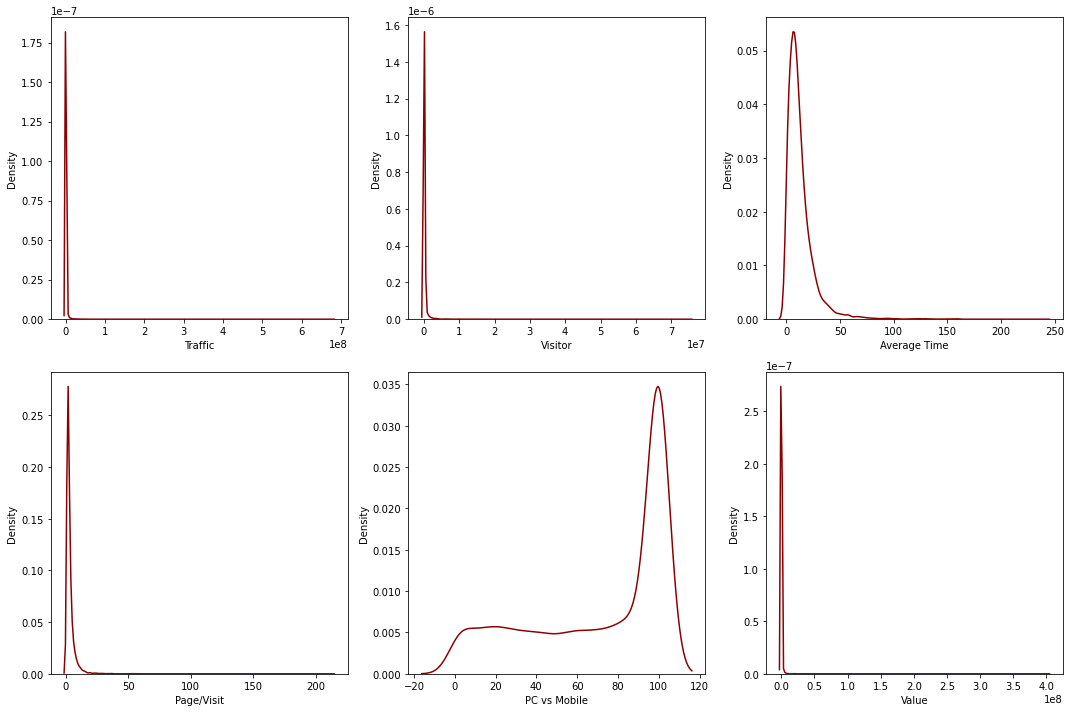

In [39]:
plt.figure(figsize=(15,10))
columns = ['Traffic','Visitor','Average Time', 'Page/Visit','PC vs Mobile','Value']
for ind, col in enumerate(columns):
    plt.subplot(2,3, ind+1)
    sns.kdeplot(df[col], color='darkred')
plt.tight_layout()
plt.show()

- Data distribution in all numerical columns is imbalanced
- This indicates the significant difference in the popularity between websites

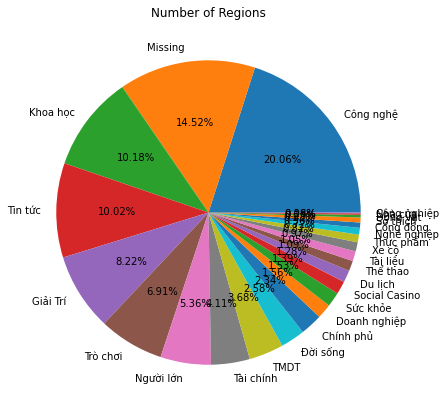

In [40]:
labels = df['Field'].value_counts().index
sizes = df['Field'].value_counts ().values

plt.figure(figsize =(7,7), facecolor='white')
plt.pie(sizes, labels=labels, autopct="%.2f%%")
plt.title("Number of Regions")
plt.show()

- TECHNOLOGY and Science dominates the chart with 26.28% ad 10.18%
- The data is missing a lot of information in this field

Relationship analysis

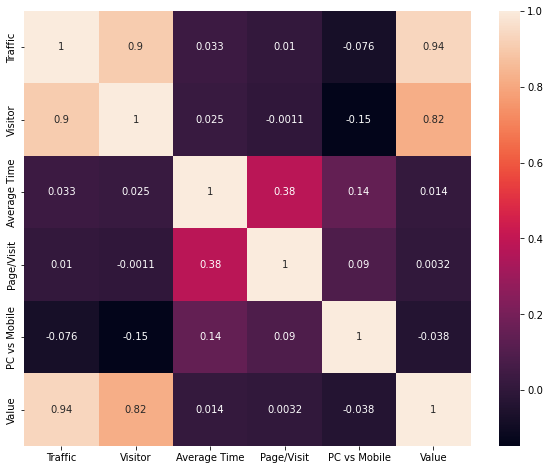

In [41]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data=corr, annot=True)
plt.show()

- There are noticeable correlations between Traffic/Value and Visitor/Value. This is because of the value of a website is based on the number of Traffic and Visitor 
- There is a high correlation between Visitors and Traffic. This is because the count of Traffic relies on the count of Visitor. If an IP didn't visit the website, there wouldn't be any increase in Traffic.  

# QUESTION AND ANSWER

Best website in each field? Based on Value

In [42]:
df1 = []
fields_df = df.groupby('Field')
fields = list(df['Field'].unique())
for ele in fields:
    onefield  = fields_df.get_group(ele)
    top1 = onefield.sort_values('Value', ascending=False).iloc[0,[0,1,7]]
    df1.append(top1)
df1 = pd.DataFrame(df1).reset_index(drop=True).sort_values('Value', ascending=False)
df1 

,Website,Field,Value
1,google.com,Công nghệ,402260531.0
0,youtube.com,Giải Trí,394265449.0
6,wikipedia.org,Tài liệu,52213219.0
7,pornhub.com,Người lớn,48801345.0
3,t.co,Missing,20144599.0
2,yahoo.com,Tin tức,17512155.0
13,money.cnn.com,Tài chính,6204161.0
11,espn.com,Thể thao,5910945.0
10,accuweather.com,Khoa học,5874930.0
12,indeed.com,Nghề nghiệp,5220710.0


Top 10 the most popular websites in Technology Field based on the number of Visitors

In [43]:
df_tech = fields_df.get_group('Công nghệ').sort_values('Visitor', ascending=False).head(10)
df_tech

,Website,Field,Traffic,Visitor,Average Time,Page/Visit,PC vs Mobile,Value
1,google.com,Công nghệ,526252980,75240611,21.45,3.34,40.51,402260531.0
2,facebook.com,Công nghệ,249247541,47305238,27.62,3.27,50.21,86066277.0
17,thegioididong.com,Công nghệ,32741778,14470668,10.58,2.59,17.95,292835.0
25,zalo.me,Công nghệ,25777010,10098057,17.83,2.15,58.55,229158.0
14,google.com.vn,Công nghệ,37842479,9620670,14.83,2.80,55.09,346086.0
100,dienmayxanh.com,Công nghệ,14740864,9173691,14.90,2.13,18.02,130455.0
37,twitter.com,Công nghệ,21189560,9010607,10.60,1.92,10.84,40054808.0
41,tiktok.com,Công nghệ,18296384,6812160,20.82,2.79,64.36,8928742.0
24,wordpress.com,Công nghệ,28468818,6450582,28.05,4.42,4.44,4464805.0
113,blogspot.com,Công nghệ,12446691,6012429,13.87,2.47,16.65,11967374.0


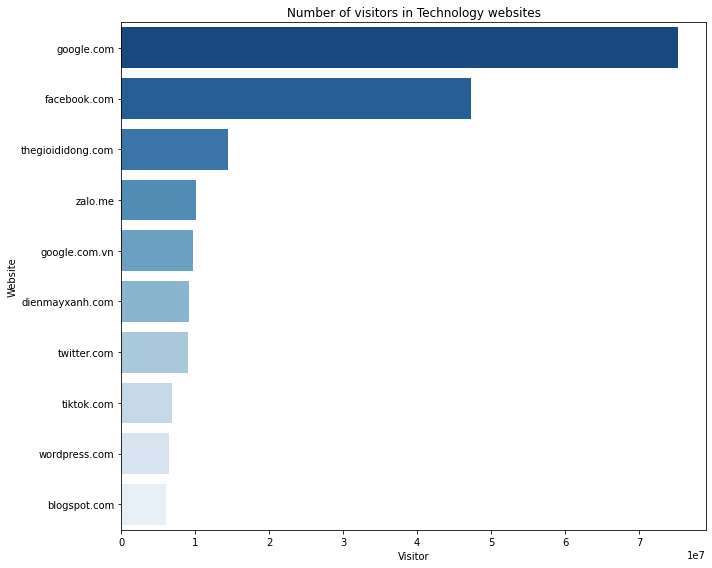

In [44]:
fig = plt.figure(figsize=(10,8))
bar = sns.barplot(x=df['Visitor'], y=df_tech['Website'], palette='Blues_r')
bar.set_title('Number of visitors in Technology websites')
plt.tight_layout()
plt.show()

- In this chart, it can be seen that Google is the most popular website. Following that is Social Networks such as facebook, Zalo, Twitter, Tiktok.
- The rise in the demand for shopping online results in a mass number of visitors to E-commerce websites such as Thegioididong (mobile devices retailer) and Dienmayxanh (electronic devices retailer)

Which website owns the highest number of Traffics?

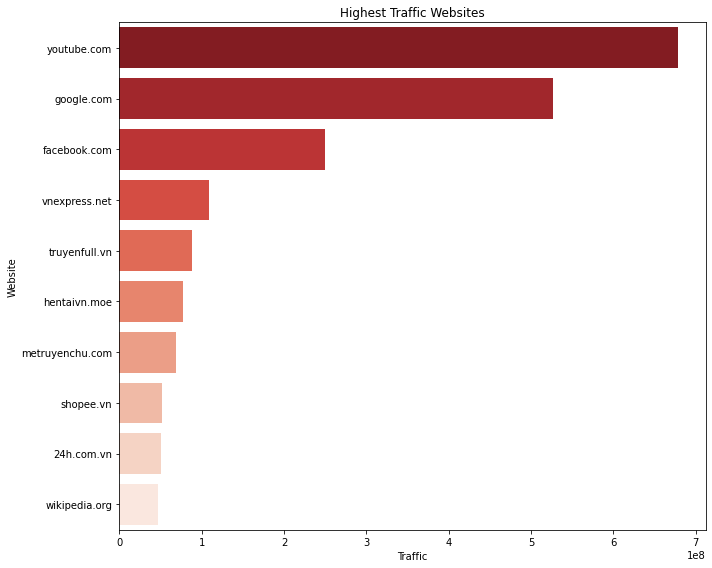

In [45]:
fig = plt.figure(figsize=(10,8))
df_traf = df.sort_values('Traffic', ascending=False).head(10)
bar = sns.barplot(x=df_traf['Traffic'], y=df_traf['Website'], palette='Reds_r')
bar.set_title('Highest Traffic Websites')
plt.tight_layout()
plt.show()

Average value, visit time, traffic, visitors of each Field?

In [46]:
df.groupby('Field').mean().drop(columns=['Page/Visit','PC vs Mobile']).sort_values('Value', ascending=False)

,Traffic,Visitor,Average Time,Value
Field,,,,
Tài liệu,7.220487e+05,343785.326733,11.058317,775209.297030
Giải Trí,1.476469e+06,238495.524590,16.567982,680611.722573
Công nghệ,7.742166e+05,223777.188017,12.157144,469288.572831
Người lớn,5.328690e+05,188565.998066,9.197718,376298.187621
Missing,6.384553e+05,211617.565310,13.011399,207552.181299
Thể thao,5.741228e+05,113799.400000,12.547429,195115.466667
TMDT,5.155354e+05,243854.540845,10.750648,178290.014085
Nhà cửa,4.785720e+05,299577.400000,9.463333,177811.933333
Tin tức,6.475269e+05,221938.573940,13.751965,156348.552223


Which device is more popular? PC or Mobile?

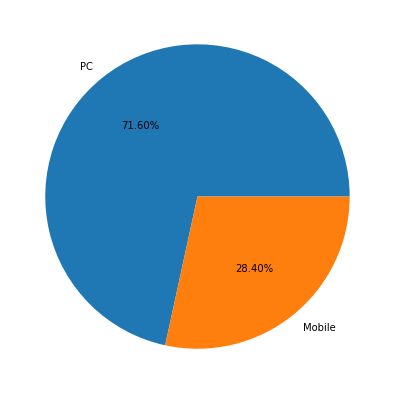

In [47]:
plt.figure(figsize =(7,7), facecolor='white')
pc = 0
for ele in df['PC vs Mobile']:
    if ele > 50:
        pc += 1
mob = len(df) - pc
pie = (pc, mob)
labels = ['PC','Mobile']
plt.pie(pie, labels=labels, autopct="%.2f%%")
plt.show()

Which type of website might be suitable to earn from running advertisments?

In [48]:
df_time = df.groupby('Field').mean('Average Time')
df_time = df_time.sort_values('Average Time', ascending=False)
df_time.reset_index(inplace=True)

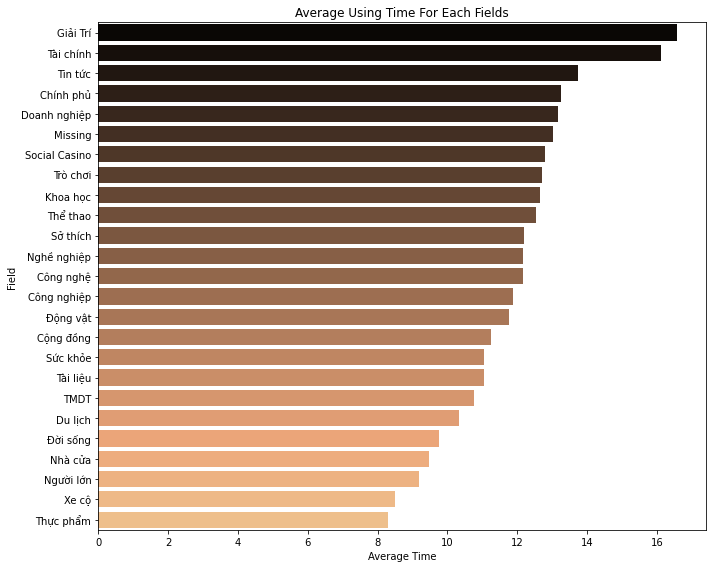

In [49]:
plt.figure(figsize =(10,8), facecolor='white')
sns.barplot(data=df_time,x =df_time['Average Time'], y =df_time['Field'], palette='copper')
plt.title('Average Using Time For Each Fields')
plt.tight_layout()
plt.show()

- As can be seen, 'Giải Trí' (Entertaining) and 'Tài chính' (Finance) websites are suitable to run marketing campains with ads due to the fact that people spent
much more time for these 2 kinds of websites.
- However, if the ads want to focus more on their target audience, it better focus on some specialized fields. For ex, launch car ads on car market websites.